# TO DO

1. Modify documents2bag_of_words method to return idx2word instead of word2idx
2. Show most important words (higher frenquency)

# Import Libraries

In [1]:
# from brown import get_documents
from g1 import get_documents
from util import documents2bag_of_words

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Load Corpus dataset

In [2]:
# brown_documents= get_documents(verbose=True)
g1_documents= get_documents(verbose=True)

article:3000 of 3000	V:78198	WORD COUNT:1311613	docid:governo-diz-que-nao-tem-dinheiro-para-obras-no-aeroporto-de-vitoriassaoaoracitonca-18toitoira-para-liberar-corpos


# Convert Corpus to BoW

In [3]:
# BoW, word2idx=  documents2bag_of_words(brown_documents)
BoW, word2idx=  documents2bag_of_words(g1_documents, lang='portuguese', exclude_links=True)

# Frequency of words by Document
BoW = pd.DataFrame(BoW)

# Presence of words by Document
BoW_unique = BoW.copy()
BoW_unique[BoW_unique > 0] = 1

document:3000 of 3000	V:46230	WORD COUNT:774032	docid:governo-diz-que-nao-tem-dinheiro-para-obras-no-aeroporto-de-vitoriassaoaoracitoncaa-18toitoira-para-liberar-corpos


# Statistical Analysis

## Declare variables

In [4]:
decile = [(x + 1.0)/10.0 for x in range(9)]
percentile = [0.0 + (x + 1.0)/100.0 for x in range(100)]
permille = [0.00 + (x + 1.0)/1000.0 for x in range(1000)]
upper_percentile = [0.9 + (x + 1.0)/100.0 for x in range(9)]
lower_percentile = [0.0 + (x + 1.0)/100.0 for x in range(9)]
upper_permille = [0.99 + (x + 1.0)/1000.0 for x in range(9)]
lower_permille = [0.00 + (x + 1.0)/1000.0 for x in range(9)]

## Corpus size

In [5]:
rows, columns = BoW.shape
n_tokens = BoW.sum().sum()

print ('Total number of documents: %d' % (columns,))
print ('Total number of tokens: %d' % (n_tokens,))
print ('Vocabulary size: %d' % (rows,))

Total number of documents: 3000
Total number of tokens: 774032
Vocabulary size: 46230


## Word frequency

In [6]:
total_word_count = BoW.sum(axis=1)
unique_word_count = BoW_unique.sum(axis=1)

# Cumulative Distribution
bins = total_word_count.quantile(permille).drop_duplicates().values
total_word_count_cut = pd.cut(total_word_count, bins=bins, right=True, include_lowest=True)

### Total

In [7]:
total_word_count.describe(percentiles=decile+upper_percentile)

count    46230.000000
mean        16.743067
std         78.715804
min          1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          2.000000
60%          3.000000
70%          5.000000
80%          9.000000
90%         25.000000
91%         29.000000
92%         34.000000
93%         40.000000
94%         48.000000
95%         58.000000
96%         76.840000
97%        109.000000
98%        164.000000
99%        296.000000
max       2928.000000
dtype: float64

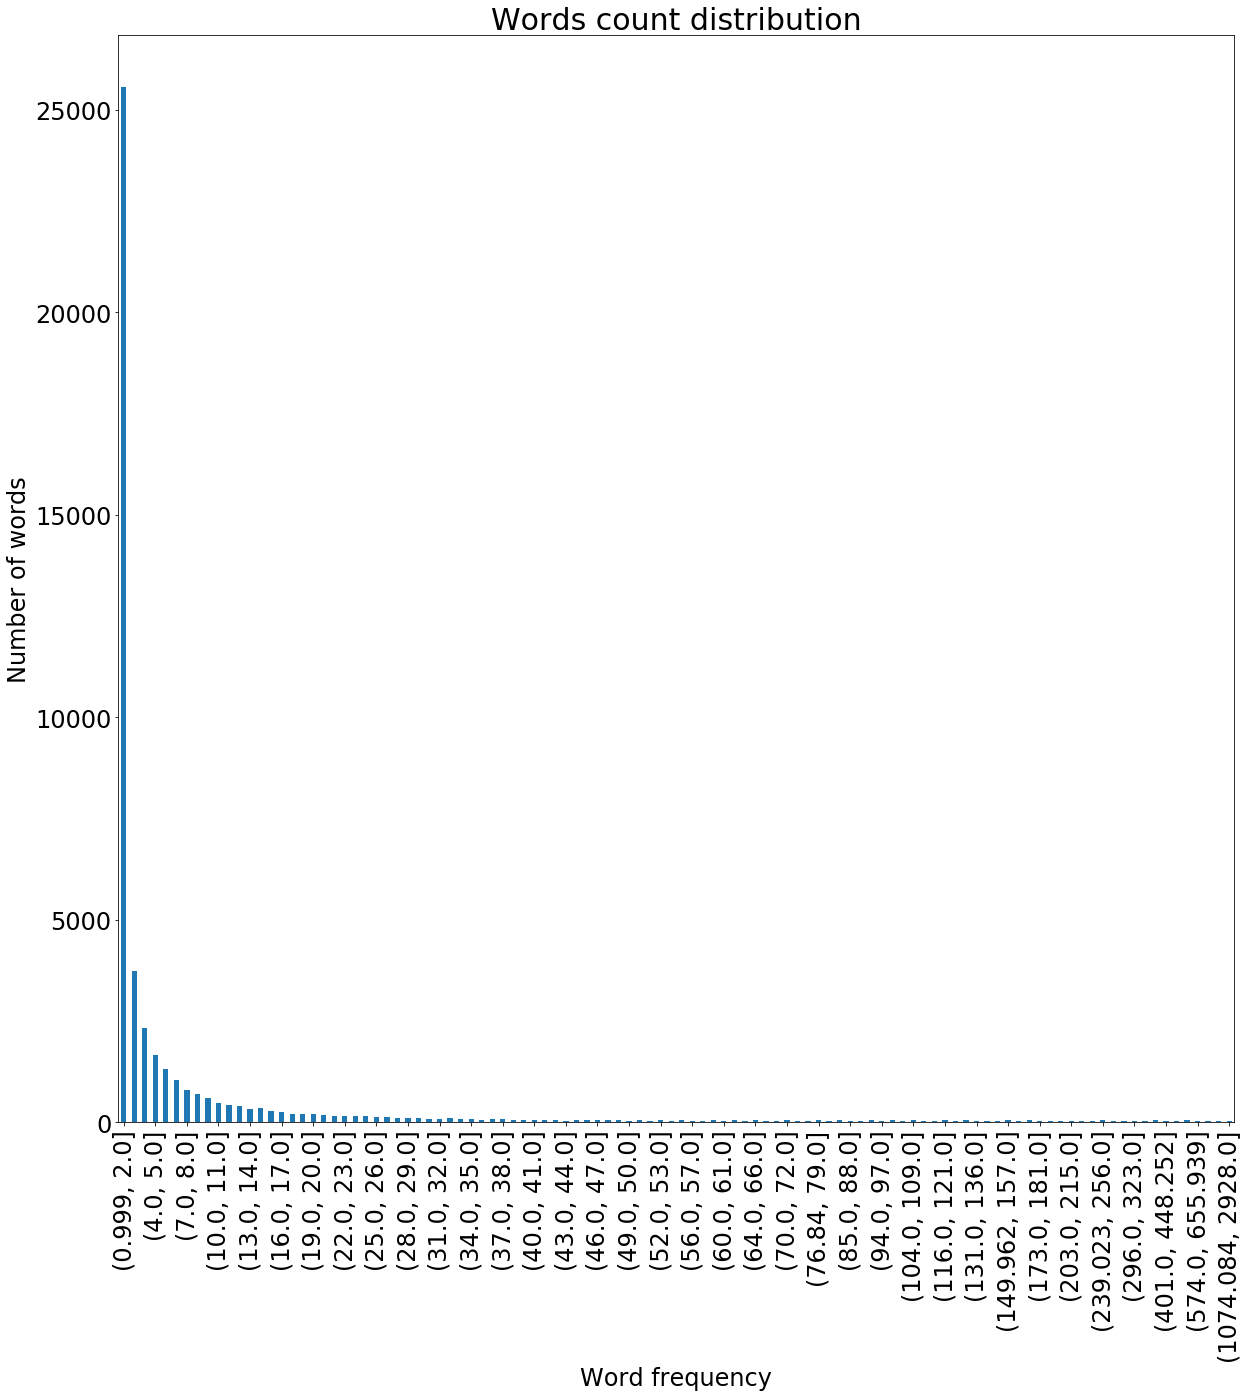

In [8]:
ax = total_word_count_cut.value_counts().sort_index().plot(kind='bar', figsize=(20,20), fontsize=24)

ax.set_title('Words count distribution', fontsize=30)
ax.set_ylabel('Number of words', fontsize=24)
ax.set_xlabel('Word frequency', fontsize=24)

n = 3
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.savefig('../../random-projection/graphics/01-word_count_distribution.svg',format='svg')

### Unique

In [9]:
unique_word_count.describe(percentiles=decile+upper_percentile)

count    46230.000000
mean        11.333441
std         51.837689
min          1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          3.000000
80%          6.000000
90%         17.000000
91%         19.000000
92%         22.000000
93%         27.000000
94%         32.000000
95%         40.000000
96%         52.000000
97%         74.000000
98%        114.000000
99%        198.710000
max       2098.000000
dtype: float64

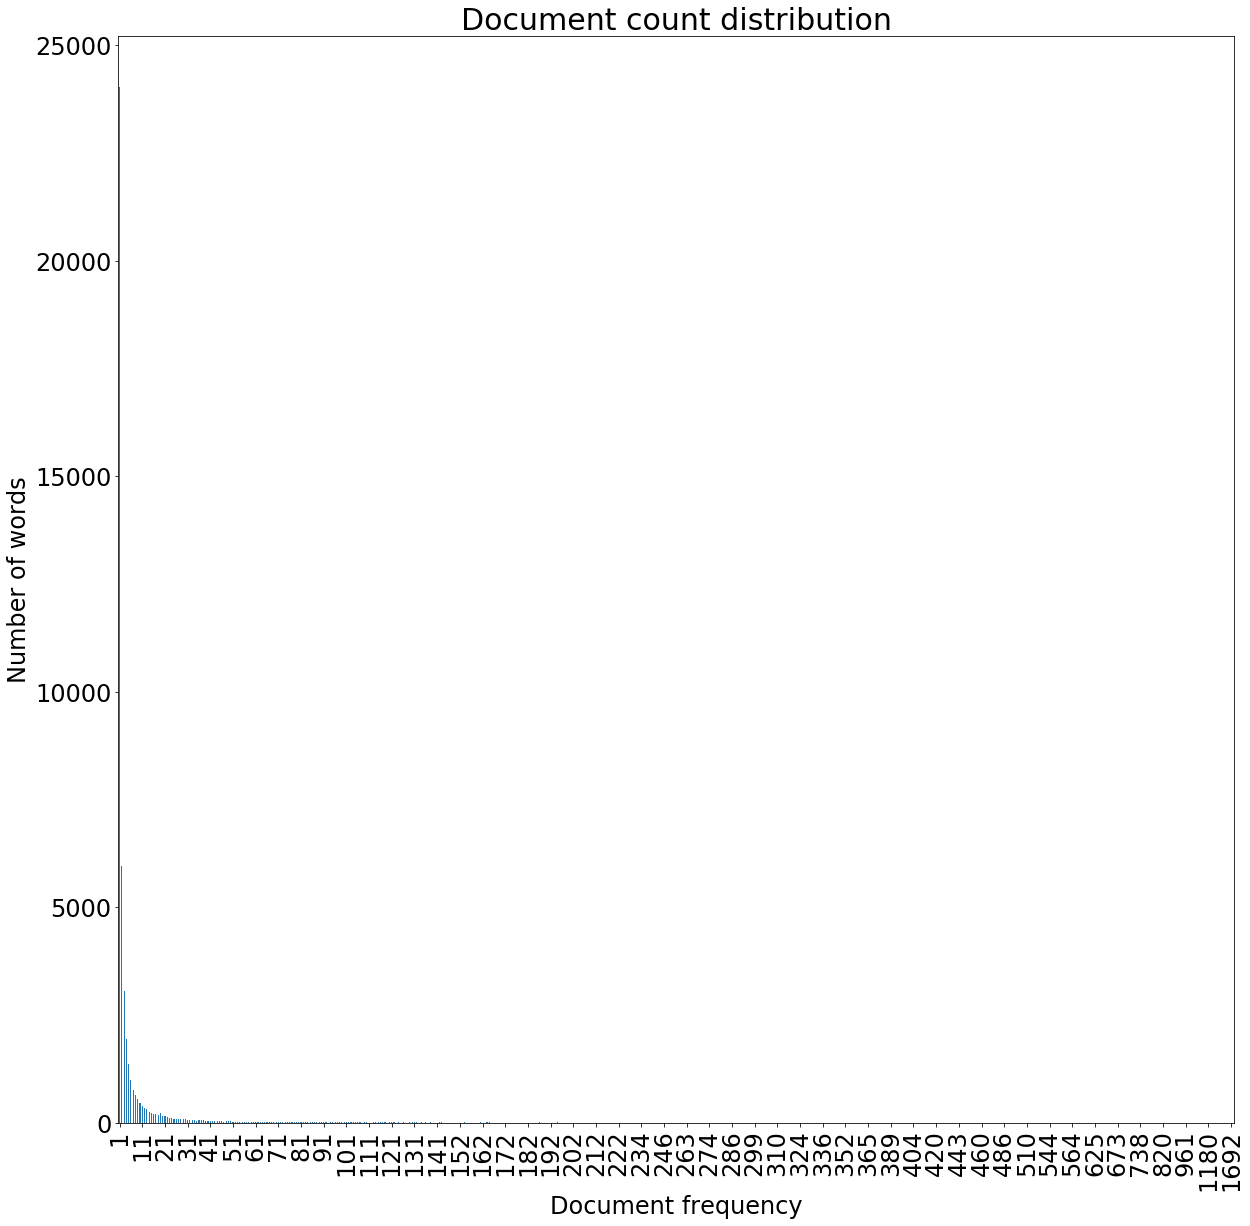

In [10]:
ax = unique_word_count.value_counts().sort_index().plot(kind='bar', figsize=(20,20), fontsize=24)

ax.set_title('Document count distribution', fontsize=30)
ax.set_ylabel('Number of words', fontsize=24)
ax.set_xlabel('Document frequency', fontsize=24)

n = 10
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

plt.savefig('../../random-projection/graphics/02-document_count_distribution.svg',format='svg')



### Vocabulary % VS Corpus (in Tokens) %

In [11]:
cumulative_word_count = total_word_count.sort_values(ascending=False).cumsum()/n_tokens
cumulative_word_count.describe(percentiles=lower_permille + lower_percentile)

count    46230.000000
mean         0.920424
std          0.119479
min          0.003783
0.1%         0.096194
0.2%         0.151351
0.3%         0.195133
0.4%         0.231572
0.5%         0.263414
0.6%         0.291603
0.7%         0.317062
0.8%         0.339781
0.9%         0.360056
1%           0.378451
2%           0.509247
3%           0.588422
4%           0.642917
5%           0.682706
6%           0.714032
7.0%         0.739983
8%           0.761751
9%           0.780319
50%          0.964486
max          1.000000
dtype: float64

## Word count by Document

In [12]:
total_words_per_doc = BoW.sum(axis=0)
unique_words_per_doc = BoW_unique.sum(axis=0)

### Total

In [13]:
total_words_per_doc.describe(percentiles=decile)

count    3000.000000
mean      258.010667
std       220.260242
min        22.000000
10%        84.900000
20%       114.000000
30%       138.000000
40%       168.000000
50%       201.000000
60%       240.400000
70%       290.000000
80%       360.200000
90%       482.000000
max      3746.000000
dtype: float64

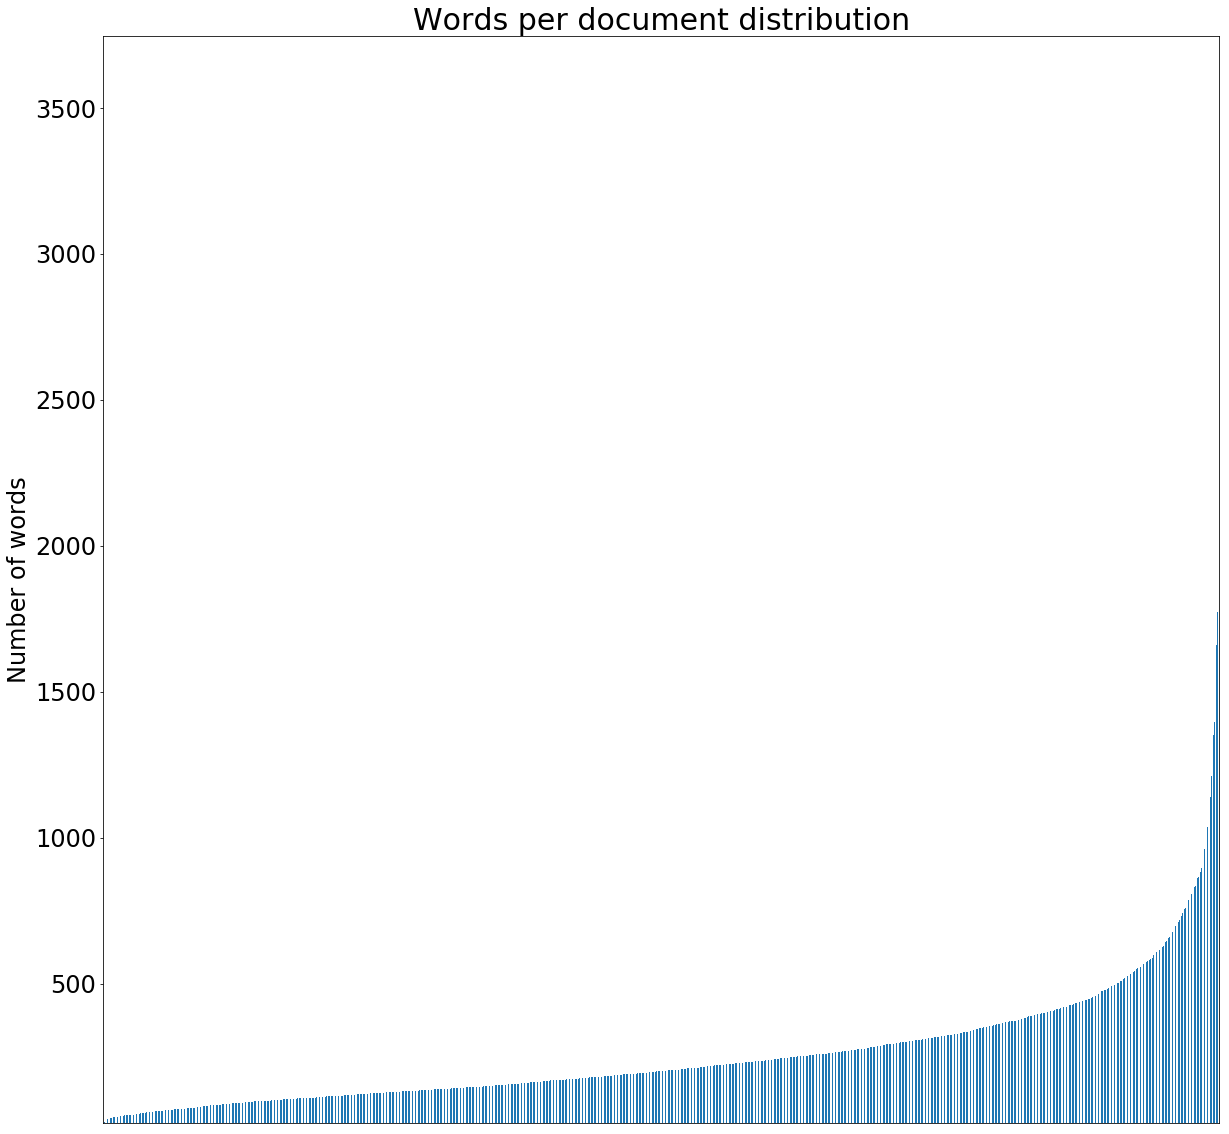

In [16]:
ylim =[min(total_words_per_doc), max(total_words_per_doc)]

ax = total_words_per_doc.sort_values().plot(kind='bar', figsize=(20,20), fontsize=24, ylim=ylim)

ax.set_title('Words per document distribution', fontsize=30)
ax.set_ylabel('Number of words', fontsize=24)
ax.get_xaxis().set_visible(False)
plt.savefig('../../random-projection/graphics/03-words_per_document_distribution.svg',format='svg')

### Unique

In [17]:
unique_words_per_doc.describe(percentiles=decile)

count    3000.000000
mean      174.648333
std       117.484624
min        20.000000
10%        67.000000
20%        89.000000
30%       105.000000
40%       126.000000
50%       147.000000
60%       170.000000
70%       198.000000
80%       240.000000
90%       313.000000
max      1685.000000
dtype: float64

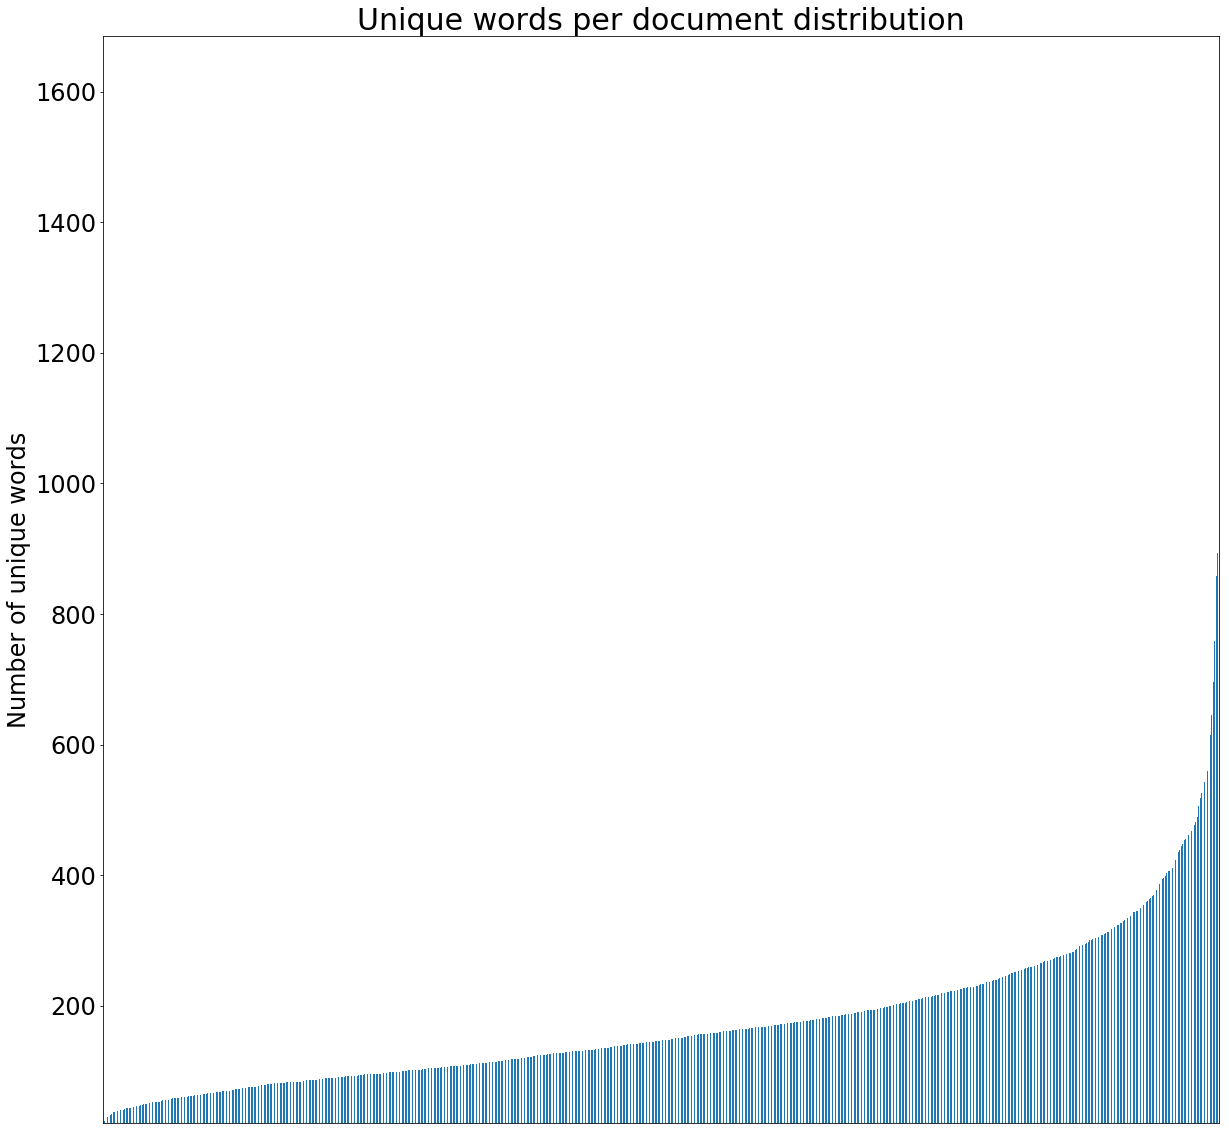

In [18]:
ylim =[min(unique_words_per_doc), max(unique_words_per_doc)]

ax = unique_words_per_doc.sort_values().plot(kind='bar', figsize=(20,20), fontsize=24, ylim=ylim)

ax.set_title('Unique words per document distribution', fontsize=30)
ax.set_ylabel('Number of unique words', fontsize=24)
ax.get_xaxis().set_visible(False)
plt.savefig('../../random-projection/graphics/04-unique_words_per_document_distribution.svg',format='svg')

# Working Area...